In [1]:
import warnings
warnings.filterwarnings("ignore")

import datetime
import matplotlib as plt
import numpy as np
import pandas as pd

from scipy.optimize import curve_fit
import sympy as sym


In [2]:
confirmed_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
deaths_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

In [3]:
data_confirmed = pd.read_csv(confirmed_url)
data_deaths = pd.read_csv(deaths_url)

In [4]:
data_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,22,24,24,40,40,74,84,94,110,110
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,64,70,76,89,104,123,146,174,186,197
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,87,90,139,201,230,264,302,367,409,454
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,53,75,88,113,133,164,188,224,267,308
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,1,2,2,3,3,3,4,4,5


In [5]:
data_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,0,0,0,1,1,1,2,4,4,4
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2,2,2,2,4,5,5,6,8,10
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,9,11,15,17,17,19,21,25,26,29
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,0,0,0,1,1,1,1,3,3,3
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data_argentina_confirmed = data_confirmed[data_confirmed['Country/Region'] == 'Argentina']
data_argentina_deaths = data_deaths[data_deaths['Country/Region'] == 'Argentina']

In [7]:
data_argentina_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,97,128,158,266,301,387,387,502,589,690


In [8]:
data_argentina_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,3,3,4,4,4,6,8,9,13,18


In [9]:
del data_argentina_confirmed['Lat']
del data_argentina_confirmed['Long']
del data_argentina_confirmed['Province/State']

del data_argentina_deaths['Lat']
del data_argentina_deaths['Long']
del data_argentina_deaths['Province/State']

In [10]:
data_argentina_confirmed.rename(columns={'Country/Region':'Date'}, inplace=True)
data_argentina_deaths.rename(columns={'Country/Region':'Date'}, inplace=True)

In [11]:
data_argentina_confirmed = data_argentina_confirmed.T
data_argentina_deaths = data_argentina_deaths.T

In [12]:
data_argentina_confirmed.head()

,6
Date,Argentina
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0


In [13]:
data_argentina_confirmed.columns = data_argentina_confirmed.iloc[0]
data_argentina_deaths.columns = data_argentina_deaths.iloc[0]

In [14]:
data_argentina_confirmed = data_argentina_confirmed.iloc[1:]
data_argentina_deaths = data_argentina_deaths.iloc[1:]

In [15]:
data_argentina_confirmed.rename(columns={'Argentina':'Total'}, inplace=True)
data_argentina_deaths.rename(columns={'Argentina':'Total'}, inplace=True)

In [16]:
data_argentina_confirmed.index=pd.to_datetime(data_argentina_confirmed.index.astype(str), format='%m/%d/%y')
data_argentina_deaths.index=pd.to_datetime(data_argentina_deaths.index.astype(str), format='%m/%d/%y')

In [17]:
data_argentina_confirmed.drop(data_argentina_confirmed[data_argentina_confirmed.index < '2020-03-01'].index, inplace=True)
data_argentina_deaths.drop(data_argentina_deaths[data_argentina_deaths.index < '2020-03-01'].index, inplace=True)

In [18]:
data_argentina_confirmed.head()

Date,Total
2020-03-01,0
2020-03-02,0
2020-03-03,1
2020-03-04,1
2020-03-05,1


In [19]:
data_argentina_confirmed['New'] = (data_argentina_confirmed.Total - data_argentina_confirmed.Total.shift(1)).fillna(0)

In [20]:
data_argentina_deaths.head()

Date,Total
2020-03-01,0
2020-03-02,0
2020-03-03,0
2020-03-04,0
2020-03-05,0


In [21]:
data_argentina_deaths['New'] = (data_argentina_deaths.Total - data_argentina_deaths.Total.shift(1)).fillna(0)

In [22]:
data_argentina = pd.merge(data_argentina_confirmed, data_argentina_deaths, left_index=True, right_index=True, suffixes=('ConfirmedCases', 'DeathCases'))

In [23]:
data_argentina

Date,TotalConfirmedCases,NewConfirmedCases,TotalDeathCases,NewDeathCases
2020-03-01,0,0,0,0
2020-03-02,0,0,0,0
2020-03-03,1,1,0,0
2020-03-04,1,0,0,0
2020-03-05,1,0,0,0
2020-03-06,2,1,0,0
2020-03-07,8,6,0,0
2020-03-08,12,4,1,1
2020-03-09,12,0,1,0
2020-03-10,17,5,1,0


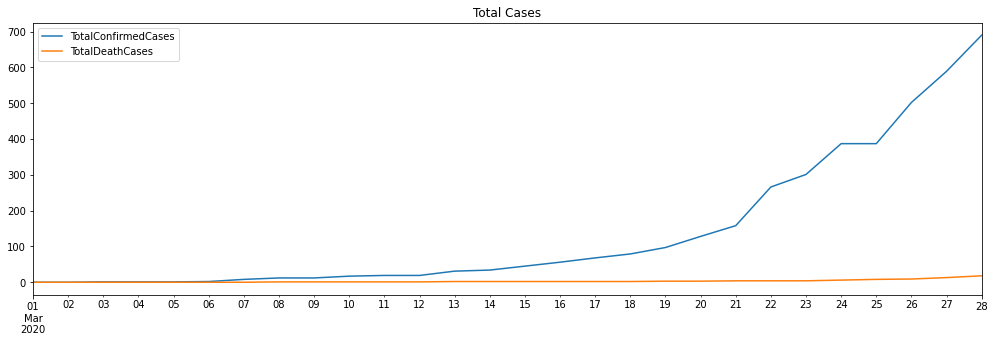

In [24]:
data_argentina.TotalConfirmedCases.plot(figsize=(17, 5), title="Total Cases", legend=True)
data_argentina.TotalDeathCases.plot(figsize=(17, 5), legend=True)

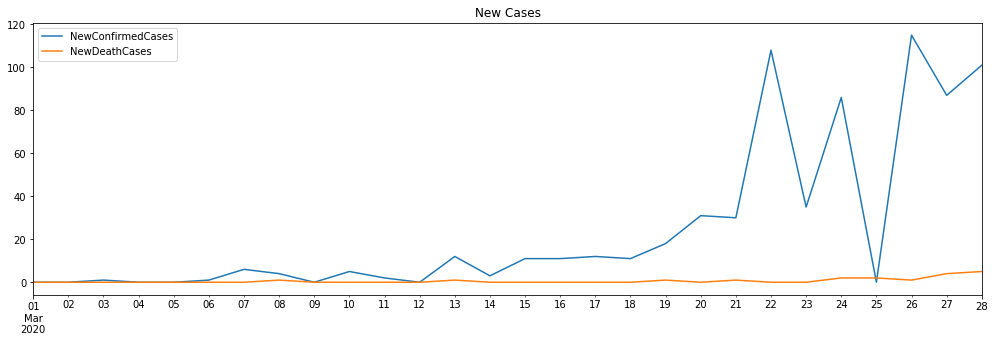

In [25]:
data_argentina.NewConfirmedCases.plot(figsize=(17, 5), title="New Cases", legend=True)
data_argentina.NewDeathCases.plot(figsize=(17, 5), legend=True)

In [26]:
predicted_days = 7
firstPredictionDay = data_argentina.index[-1] + datetime.timedelta(days = 1)

In [27]:
data_argentina['num_id'] = np.arange(len(data_argentina))
data_argentina.head()

Date,TotalConfirmedCases,NewConfirmedCases,TotalDeathCases,NewDeathCases,num_id
2020-03-01,0,0,0,0,0
2020-03-02,0,0,0,0,1
2020-03-03,1,1,0,0,2
2020-03-04,1,0,0,0,3
2020-03-05,1,0,0,0,4


In [28]:
def cuadratic_model(x, a, b, c):
    return a*x**2 + b*x +c

def cubic_model(x, a, b, c, d):
    return a*x**3 + b*x**2 +c*x + d

def fourth_pow_model(x, a, b, c, d, e):
    return a*x**4 + b*x**3 +c*x**2 + d*x + e

In [29]:
def formatPrediction(firstPredictionDay, day, prediction):
    formatedDate = str(firstPredictionDay + datetime.timedelta(days = day))[0:10]
    formatedPrediction = str(int(prediction))
    return formatedDate + " - " + formatedPrediction

def printPrediction(model, popt, x, y):
    firstPredictionDayId = x.max() + 1
    
    for day in range (0, predicted_days):
        predictionId = firstPredictionDayId + day
        predictionValue = model(predictionId, *popt)
        print(formatPrediction(firstPredictionDay, day, predictionValue))

In [30]:
def plotPrediction(model, popt, x, y):
    xs = sym.Symbol('\lambda')    
    tex = sym.latex(model(xs,*popt)).replace('$', '')

    plt.pyplot.title(r'$f(\lambda)= %s$' %(tex),fontsize=12)

    plt.pyplot.plot(x, model(x, *popt))
    plt.pyplot.plot(x, y, 'ro')

In [31]:
def predictData(model, x, y):
    popt, _ = curve_fit(model, x, y)
    printPrediction(model, popt, x, y)
    plotPrediction(model, popt, x, y)

2020-03-29 - 677
2020-03-30 - 747
2020-03-31 - 821
2020-04-01 - 899
2020-04-02 - 980
2020-04-03 - 1064
2020-04-04 - 1152


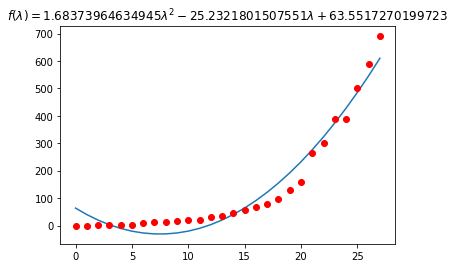

In [32]:
predictData(cuadratic_model, data_argentina.num_id, data_argentina.TotalConfirmedCases)

2020-03-29 - 795
2020-03-30 - 915
2020-03-31 - 1047
2020-04-01 - 1190
2020-04-02 - 1347
2020-04-03 - 1516
2020-04-04 - 1699


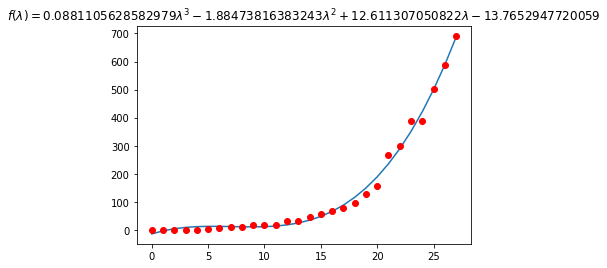

In [33]:
predictData(cubic_model, data_argentina.num_id, data_argentina.TotalConfirmedCases)

2020-03-29 - 810
2020-03-30 - 941
2020-03-31 - 1085
2020-04-01 - 1246
2020-04-02 - 1423
2020-04-03 - 1618
2020-04-04 - 1831


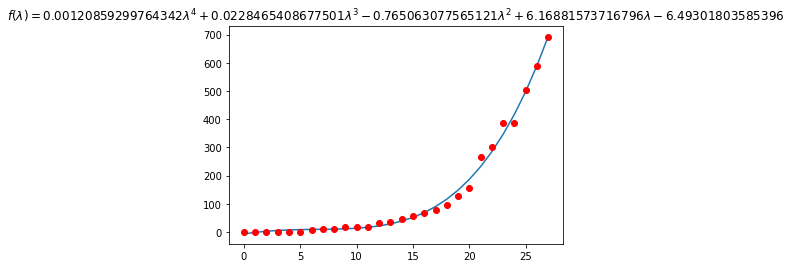

In [34]:
predictData(fourth_pow_model, data_argentina.num_id, data_argentina.TotalConfirmedCases)